In [1]:
# tree 가 많이 모여 있는 것이 Forest
# Ensemble(앙상블) : Model 들을 같이 엮어서 사용하는 방법
# R에서는 앙상블이 RandomForest 밖에 없다.


In [2]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [19]:
library(caret)

In [27]:
set.seed(1234)
# Sampling 데이터가 많으면 0.8 또는 5:5도 좋음
samp <- createDataPartition(iris$Species , p = 0.7 , list = F)
# 학습용 데이터 만들기
data.tr <- iris[samp,]
# 검증용 데이터 만들기
data.test <- iris[-samp,]
# 문제 및 정답 만들기
x <- subset(data.test , select = -Species )
y <- data.test$Species

In [28]:
summary(data.tr)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

In [36]:
# 학습시키기
model.rf <- randomForest(Species ~ ., data = data.tr, ntree = 100)
#RandomForest는 Species 가 팩터면 class로 풀고, num이면 raw로 푼다.
#앙상블 중에서는 RandomForest가 가장 좋다
#R에서는 앙상블을 못만들고 파이썬은 만들 수 있다.
#데이터가 잘정제되있으면 어떤 기법이든 다 잘나온다.

In [37]:
# 검증하기
pred <- predict ( model.rf,x)

In [38]:
# 예측력과 오류분포
mean(pred == y )
table(pred,y)


[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기 (회귀식과 RandomForest 예측 비교)

In [40]:
seoul <- read.csv("../Data/newSeoul2019.csv")
head(seoul)
tail(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


In [41]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [42]:
summary(seoul)

      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [46]:
# 종로구 데이터셋 만들기
JongRo <- seoul[seoul$자치구명 == "종로구" ,]
head(JongRo)
tail(JongRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2407,2019,7,종로구,83,0,109
2408,2019,8,종로구,115,0,164
2409,2019,9,종로구,99,0,143
2410,2019,10,종로구,104,0,139
2411,2019,11,종로구,100,0,126
2412,2019,12,종로구,100,0,142


In [48]:
rownames(JongRo)<- c()
head(JongRo)
tail(JongRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [53]:
str(JongRo)


'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [52]:
JongRo$자치구명 <- factor(JongRo$자치구명)

In [54]:
JongRo <- JongRo[,-3]
head(JongRo)

년도,월,발생건수,사망자수,부상자수
2011,1,115,2,165
2011,2,99,0,134
2011,3,116,0,162
2011,4,110,1,153
2011,5,122,0,157
2011,6,116,3,163


In [67]:
# 종로의 발생건수와 부상자수 상관계수
cor(JongRo[,3],JongRo[,5])
cor(JongRo[,3],JongRo[,4]) # 발생건수 사망자수
cor(JongRo[,4],JongRo[,5]) # 사망자수 부상자수

[1] 0.9208914

[1] -0.01623808

[1] 0.01865633

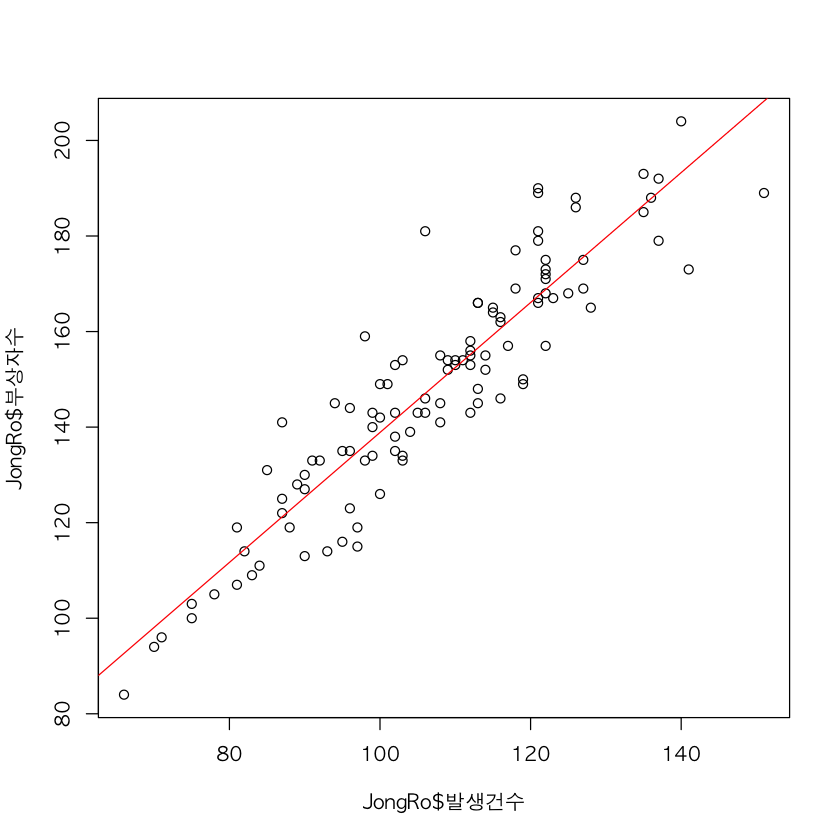

In [92]:
# 종로구의 발생건수와 부상자수의 산포도와 회귀선 그리기
par(family = "AppleGothic")
options(warn = -1)
plot(JongRo$발생건수,JongRo$부상자수)
abline(model.reg, col = "red")

In [96]:
model.reg <- lm(JongRo$부상자수 ~ JongRo$발생건수 , data = JongRo) 
model.reg


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수, data = JongRo)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


In [97]:
summary(model.reg)



Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수, data = JongRo)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
JongRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


In [ ]:
# 예측력 Adjusted R-squared:  0.8466 

In [98]:
step(model.reg, direction = "backward" )

Start:  AIC=495.34
JongRo$부상자수 ~ JongRo$발생건수

                  Df Sum of Sq   RSS    AIC
<none>                         10215 495.34
- JongRo$발생건수  1     57004 67219 696.83



Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수, data = JongRo)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


In [164]:
# 회귀식
# - 발생건수가 100건일 경우의 부상 자수 예측
funreg <- function (x){
    y =1.35993* x
    return (y)
}
cat(funreg(100) - 9.816 , "~",funreg(100) + 9.816)

126.177 ~ 145.809

In [230]:
funreg(145)
funreg(150)
funreg(85)

[1] 197.1899

[1] 203.9895

[1] 115.5941

In [165]:
nrow(JongRo)

[1] 108

In [233]:
# 랜덤포레스트로 예측
# - 발생건수가 100건일 경우의 부상자수 예측

data.tr <- JongRo[,]
x <- data.frame(발생건수 = 200)

In [234]:
a<- 0
for (i in 1:5){
    model.rf <- randomForest(부상자수 ~ 발생건수, data = data.tr, ntree = 100)
    pred <- predict(model.rf,x)
    pred
    a<- c(a,pred)
}
a<- a[-1]
mean(a)

[1] 184.5361

1 
138.6124

In [153]:


samp <- sample(1:108,75)
# 학습용 데이터 만들기
data.tr <- JongRo[samp,]
# 검증용 데이터 만들기
data.test <- JongRo[-samp,]
# 문제 및 정답 만들기
x <- subset(data.test , select = 발생건수 )
y <- data.test$부상자수

In [154]:
pred2 <- predict(model.rf,x)
pred2

7        11        13        14        16        17        18        29 
140.74138 191.68783 153.51860 169.08950 178.58891 178.58891 152.01400 142.34526 
       33        35        36        38        39        44        50        51 
124.20902 173.06100 153.20827  93.79633 142.34526 154.47112 112.18550 178.58891 
       52        53        65        67        71        74        75        80 
188.35950 187.33150 184.97183 169.81148 141.51014  94.76633 139.00113 111.77717 
       82        83        85        92        94       102       103       106 
134.56733 122.00533 140.74138 124.20902 156.10511 128.28283 111.19383 139.83505 
      108 
139.31850

In [225]:
sqrt(sum((pred2-y)^2))/length(y)

[1] 1.223477

In [238]:
#(paste(JongRo$년도,JongRo$월,sep = "/"))
#as.Date(paste(JongRo$년도,JongRo$월,sep = "/"),"%Y/%m")

[1] "2011/1"  "2011/2"  "2011/3"  "2011/4"  "2011/5"  "2011/6"  "2011/7" 
  [8] "2011/8"  "2011/9"  "2011/10" "2011/11" "2011/12" "2012/1"  "2012/2" 
 [15] "2012/3"  "2012/4"  "2012/5"  "2012/6"  "2012/7"  "2012/8"  "2012/9" 
 [22] "2012/10" "2012/11" "2012/12" "2013/1"  "2013/2"  "2013/3"  "2013/4" 
 [29] "2013/5"  "2013/6"  "2013/7"  "2013/8"  "2013/9"  "2013/10" "2013/11"
 [36] "2013/12" "2014/1"  "2014/2"  "2014/3"  "2014/4"  "2014/5"  "2014/6" 
 [43] "2014/7"  "2014/8"  "2014/9"  "2014/10" "2014/11" "2014/12" "2015/1" 
 [50] "2015/2"  "2015/3"  "2015/4"  "2015/5"  "2015/6"  "2015/7"  "2015/8" 
 [57] "2015/9"  "2015/10" "2015/11" "2015/12" "2016/1"  "2016/2"  "2016/3" 
 [64] "2016/4"  "2016/5"  "2016/6"  "2016/7"  "2016/8"  "2016/9"  "2016/10"
 [71] "2016/11" "2016/12" "2017/1"  "2017/2"  "2017/3"  "2017/4"  "2017/5" 
 [78] "2017/6"  "2017/7"  "2017/8"  "2017/9"  "2017/10" "2017/11" "2017/12"
 [85] "2018/1"  "2018/2"  "2018/3"  "2018/4"  "2018/5"  "2018/6"  "2018/7" 
 [92] "2018/8"  "2018/9"  "2018/10" "2018/11" "2018/12" "2019/1"  "2019/2" 
 [99] "2019/3"  "2019/4"  "2019/5"  "2019/6"  "2019/7"  "2019/8"  "2019/9" 
[106] "2019/10" "2019/11" "2019/12"

In [ ]:
regression <- lm()